In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# data 
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat',
                  names =['Frequency','Angle of attack','Chord length','Free-stream','thickness','level'])
df.describe()

,Frequency,Angle of attack,Chord length,Free-stream,thickness,level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [9]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream,thickness,level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


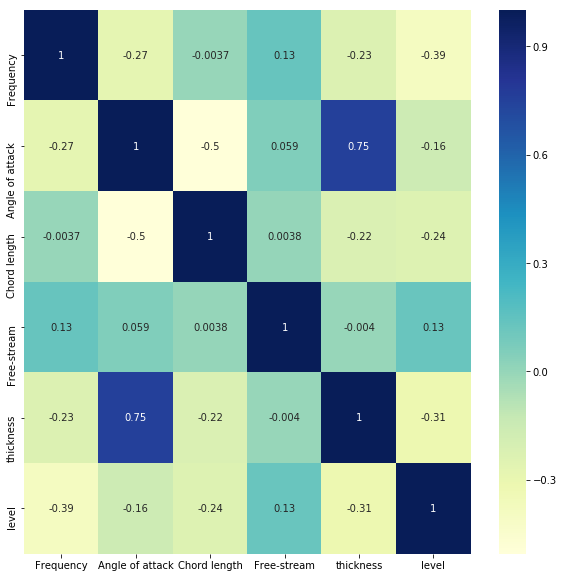

In [17]:
plt.figure( figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

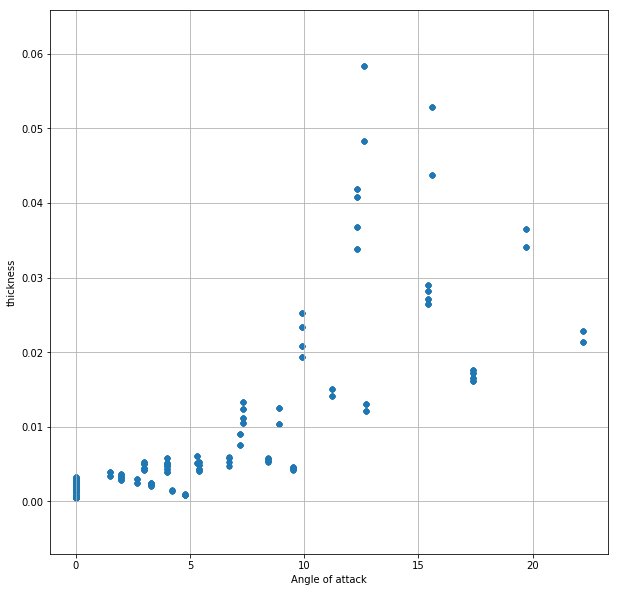

In [27]:
df.plot.scatter(x='Angle of attack', y='thickness',figsize=(10, 10),grid=True)

In [29]:
x_data = df['Angle of attack']
y_data = df['thickness']
print(x_data.shape)
print('--------')
print(y_data.shape)

(1503,)
--------
(1503,)


In [35]:
def tf_elu(x): return tf.nn.elu(x)
def d_tf_elu(x): return tf.cast(tf.greater(x,0),tf.float64)  + (tf_elu(tf.cast(tf.less_equal(x,0),tf.float64) * x) + 1.0)
class FNN():
    
    def __init__(self,input_dim,hidden_dim,act,d_act):
        self.w = tf.Variable(tf.random_normal([input_dim,hidden_dim], stddev=0.05,seed=2,dtype=tf.float64))
        self.m,self.v_prev = tf.Variable(tf.zeros_like(self.w,dtype=tf.float64)),tf.Variable(tf.zeros_like(self.w,dtype=tf.float64))
        self.v_hat_prev = tf.Variable(tf.zeros_like(self.w))
        self.act,self.d_act = act,d_act

    def getw(self): return [self.w]

    def feedforward(self,input=None):
        self.input = input
        self.layer = tf.matmul(input,self.w)
        self.layerA = self.act(self.layer)
        return self.layerA

    def backprop(self,gradient=None):
        grad_part_1 = gradient 
        grad_part_2 = self.d_act(self.layer) 
        grad_part_3 = self.input

        grad_middle = grad_part_1 * grad_part_2
        grad = tf.matmul(tf.transpose(grad_part_3),grad_middle)
        grad_pass = tf.matmul(tf.multiply(grad_part_1,grad_part_2),tf.transpose(self.w))

        update_w = []
        update_w.append(tf.assign( self.m,self.m*beta1 + (1-beta1) * (grad)   ))
        update_w.append(tf.assign( self.v_prev,self.v_prev*beta2 + (1-beta2) * (grad ** 2)   ))
        m_hat = self.m / (1-beta1)
        v_hat = self.v_prev / (1-beta2)
        adam_middel = learning_rate/(tf.sqrt(v_hat) + adam_e)
        update_w.append(tf.assign(self.w,tf.subtract(self.w,tf.multiply(adam_middel,m_hat)  )))     

        return grad_pass,update_w  

In [36]:
learning_rate = 0.001
batch_size = 1503

beta1,beta2,adam_e = 0.9,0.999,1e-8

l1 = FNN(1,1,act=tf_elu,d_act=d_tf_elu)

x = tf.placeholder(shape=[None,1],dtype=tf.float64)
y = tf.placeholder(shape=[None,1],dtype=tf.float64)
layer1 = l1.feedforward(x)

cost = tf.reduce_mean(tf.square(layer1 - y) * 0.5)

grad1,grad1_up = l1.backprop(layer1-y)

NameError: name 'beta1' is not defined

In [ ]:
learning